# Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.

2.Controls for Hispanic Origin by age and sex.

3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Uploading all the Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")




In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From this we can understand no null values present in our dataset.And there are some coloumn with int and object values

In [6]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data: ", object_datatype)


# getting the list of float data type column names
integer_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        integer_datatype.append(x)
print(f"\nFloat Data: ", integer_datatype)


Object Data:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

Float Data:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


# statistical analysis

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


From the statistical Analysis we can see no missing data, for the capital_gain,capital_loss we can see 0.0 for min,25%,50%,75% as we can say some outliers were present in the dataset

In [8]:
df.isna().sum()  ###checking the null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
df.nunique().to_frame("Unique Values")

,Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


# check valuecount for each coloumn

In [10]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       41

we can see some coloumn were present with ? so we need to replace that

In [11]:
###replacing ? present in our dataset
df['Workclass'].replace({' ?':' Other-Working-Class'},inplace=True)
df['Occupation'].replace({' ?':' Other-Occupation'},inplace=True)
df['Native_country'].replace({' ?':' Others'},inplace=True)


In [12]:
df.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
7621,35,Private,133906,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
25950,21,Private,170456,Assoc-acdm,12,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,15,United-States,<=50K
3786,26,Private,78172,Some-college,10,Married-AF-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
30700,53,Private,183973,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
4388,32,Self-emp-inc,46807,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K


# Visualisation

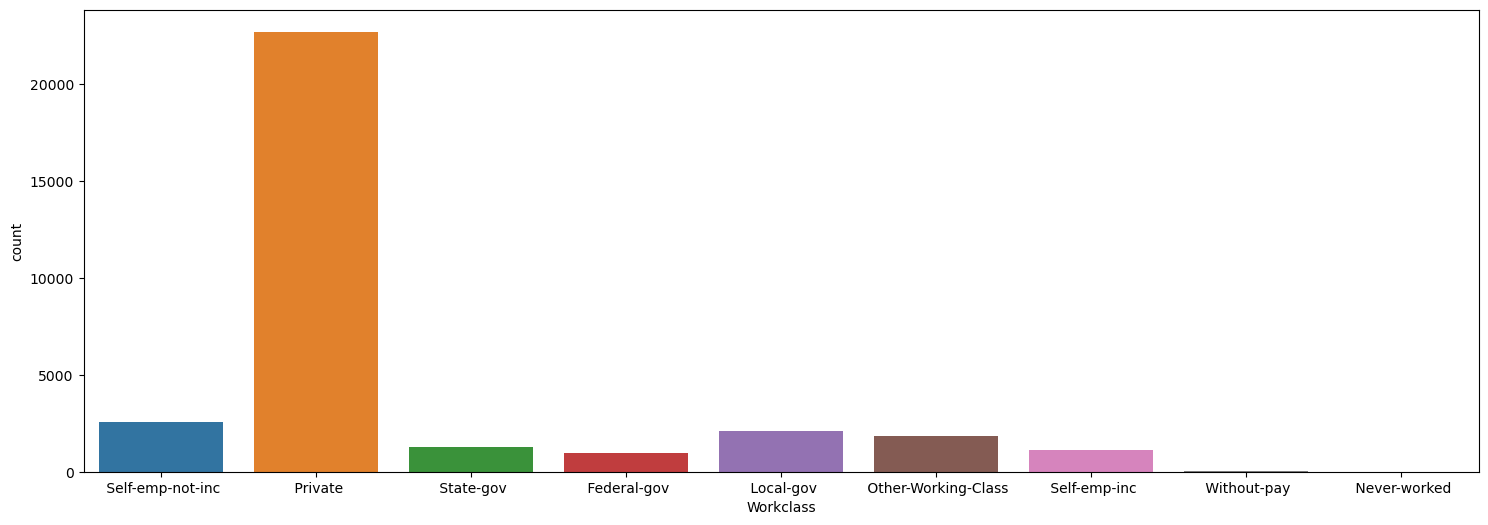

In [13]:
plt.figure(figsize=(18,6))
sns.countplot(df["Workclass"])
plt.show()


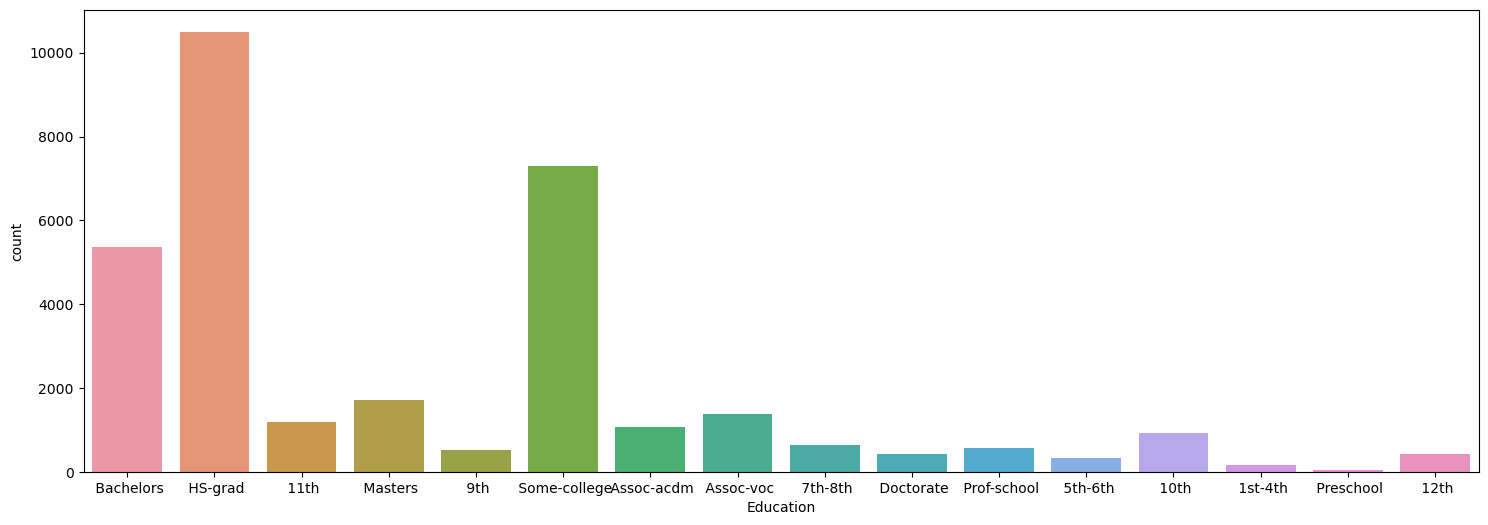

In [14]:
plt.figure(figsize=(18,6))
sns.countplot(df["Education"])
plt.show()


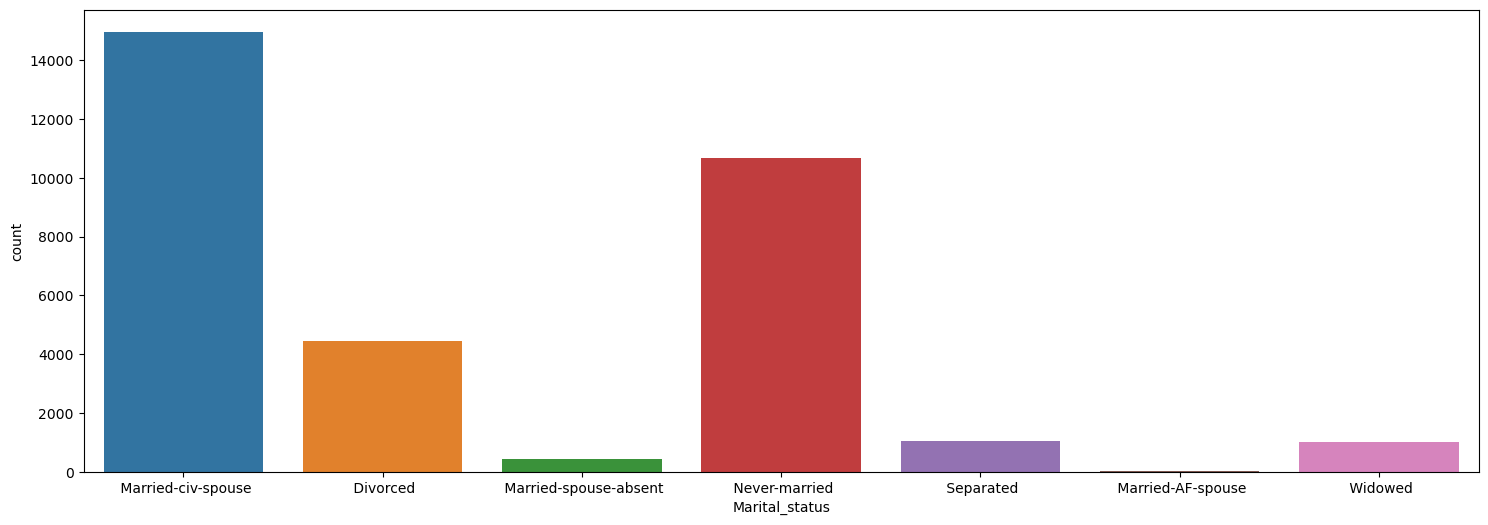

In [15]:
plt.figure(figsize=(18,6))
sns.countplot(df["Marital_status"])
plt.show()


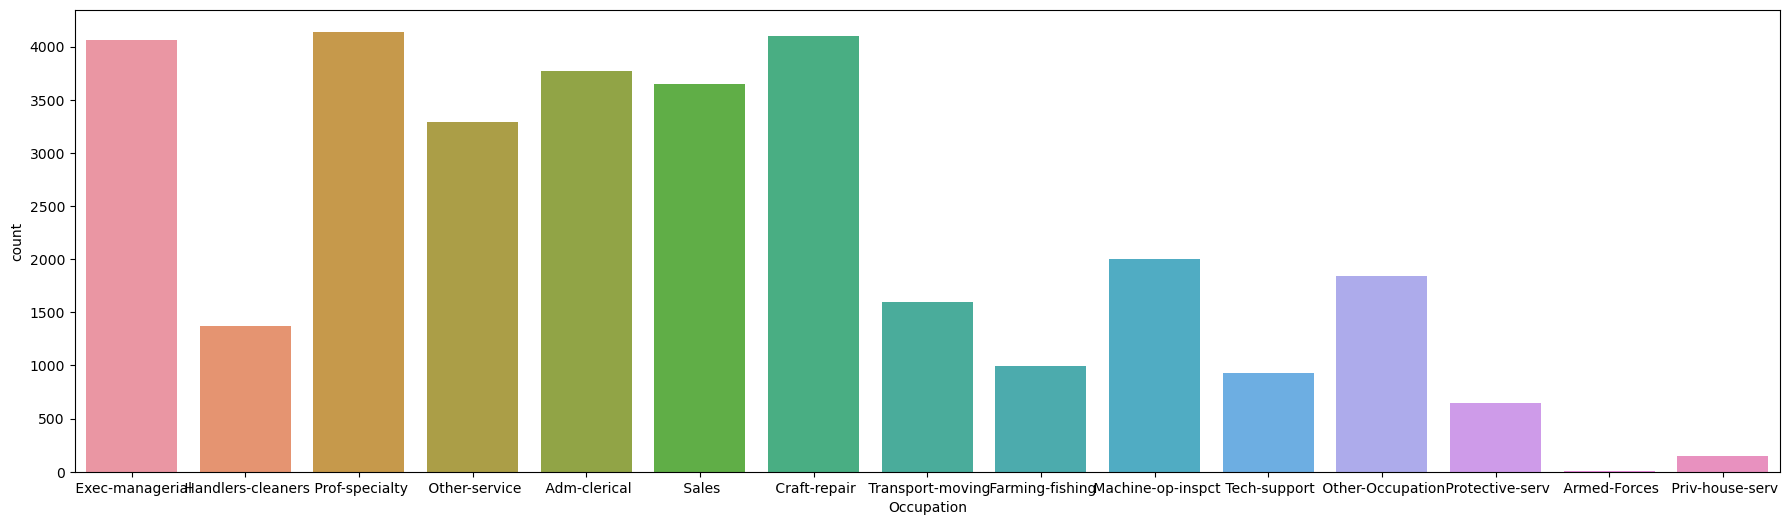

In [16]:
plt.figure(figsize=(22,6))
sns.countplot(df["Occupation"])
plt.show()


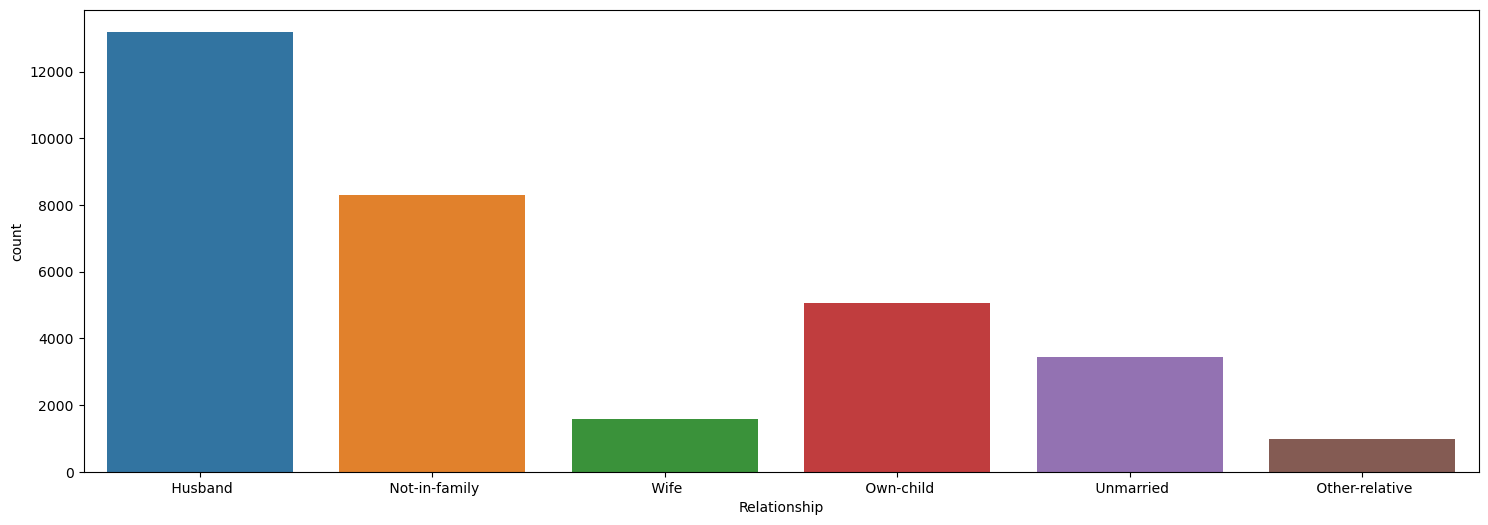

In [17]:
plt.figure(figsize=(18,6))
sns.countplot(df["Relationship"])
plt.show()


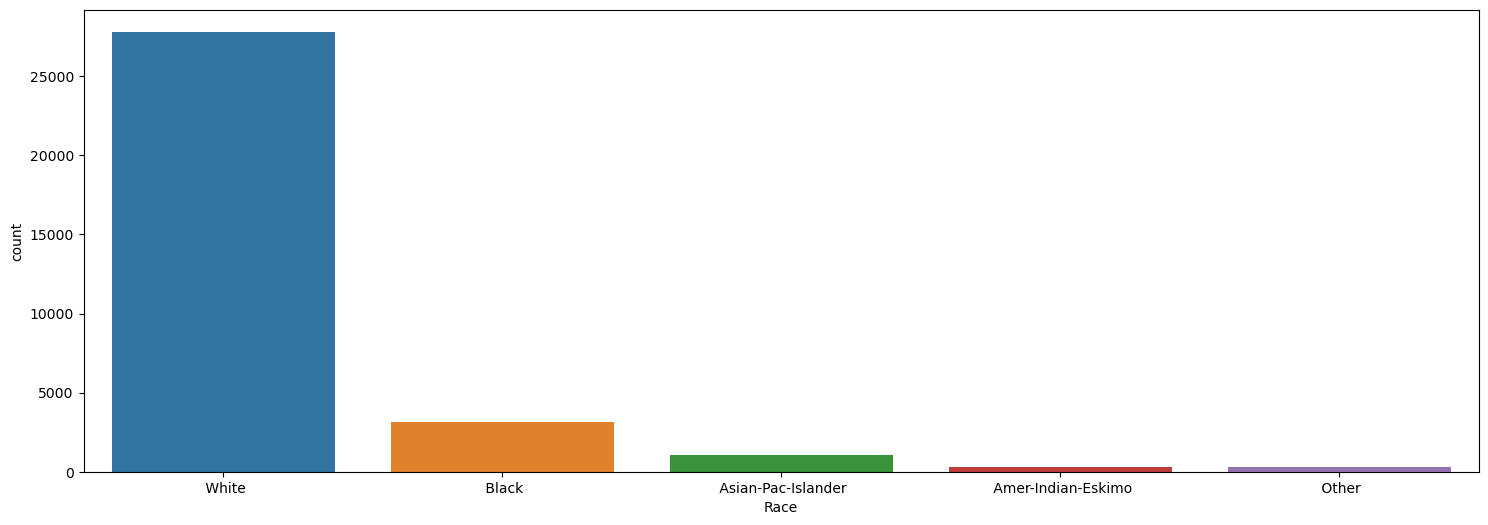

In [18]:
plt.figure(figsize=(18,6))
sns.countplot(df["Race"])
plt.show()


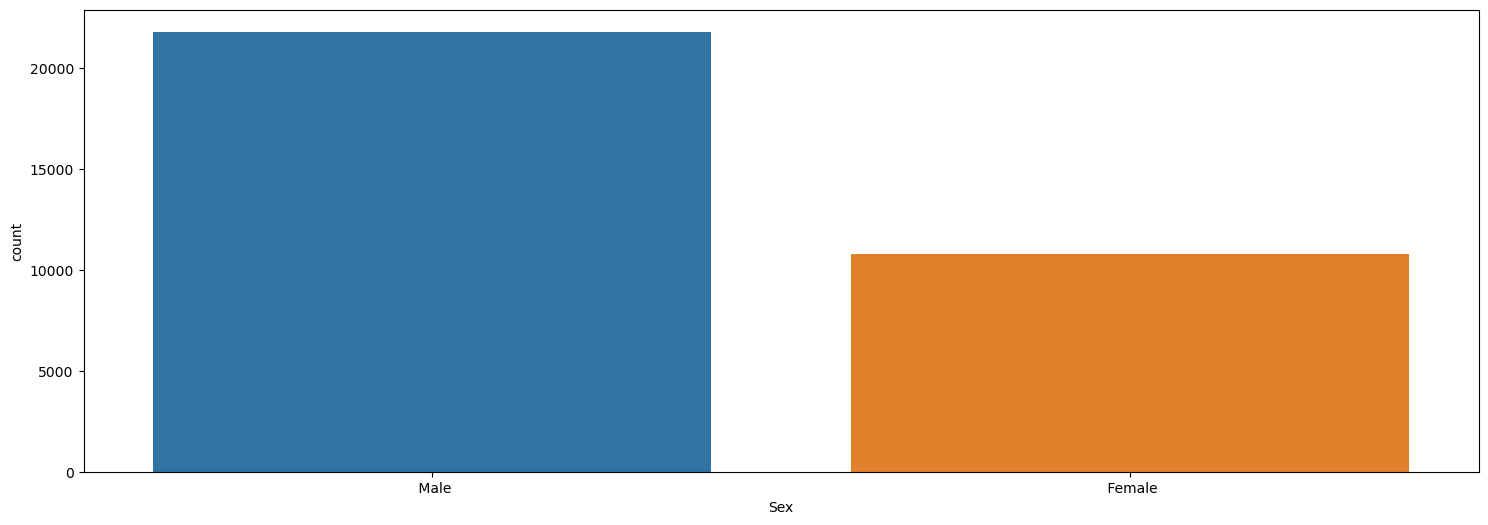

In [19]:
plt.figure(figsize=(18,6))
sns.countplot(df["Sex"])
plt.show()

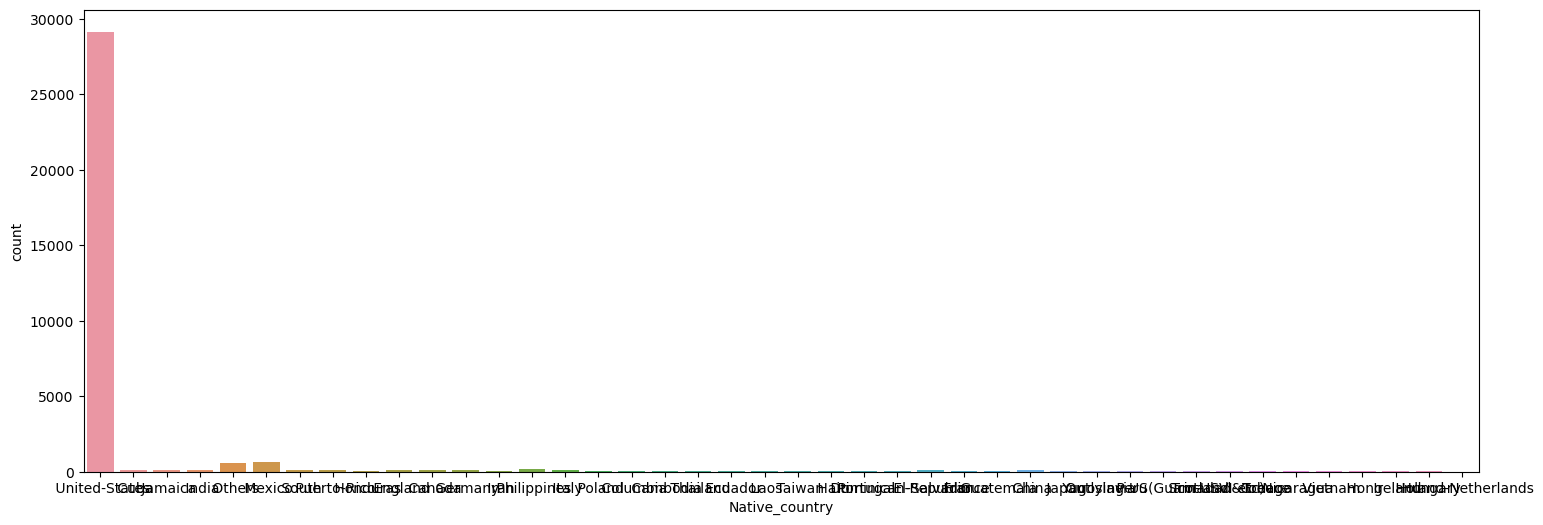

In [20]:
plt.figure(figsize=(18,6))
sns.countplot(df["Native_country"])
plt.show()


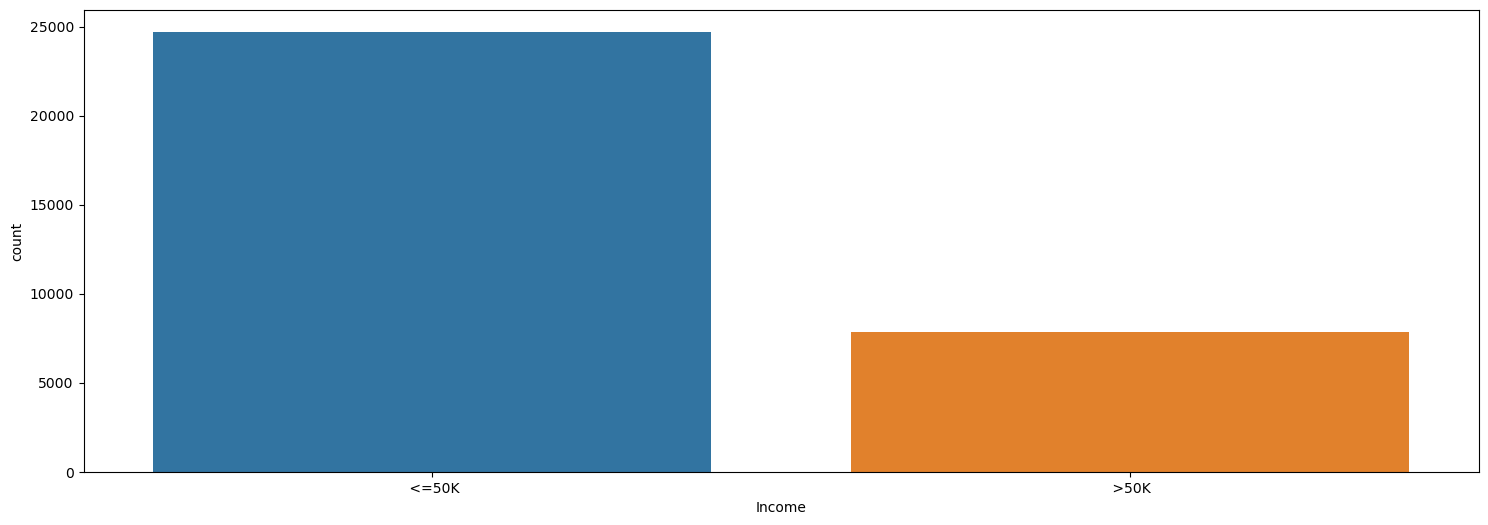

In [21]:
plt.figure(figsize=(18,6))
sns.countplot(df["Income"])
plt.show()


# Encoding the categorical data

In [22]:
le = LabelEncoder()
df["Income"] = le.fit_transform(df["Income"])
df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [23]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['Workclass'] = oe.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status'] = oe.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation'] = oe.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship'] = oe.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Native_country'] = oe.fit_transform(df['Native_country'].values.reshape(-1,1))
df['Race'] = oe.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex'] = oe.fit_transform(df['Sex'].values.reshape(-1,1))
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,4.0,0
4,37,4.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,39.0,0


In [24]:
df.isnull().sum()


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

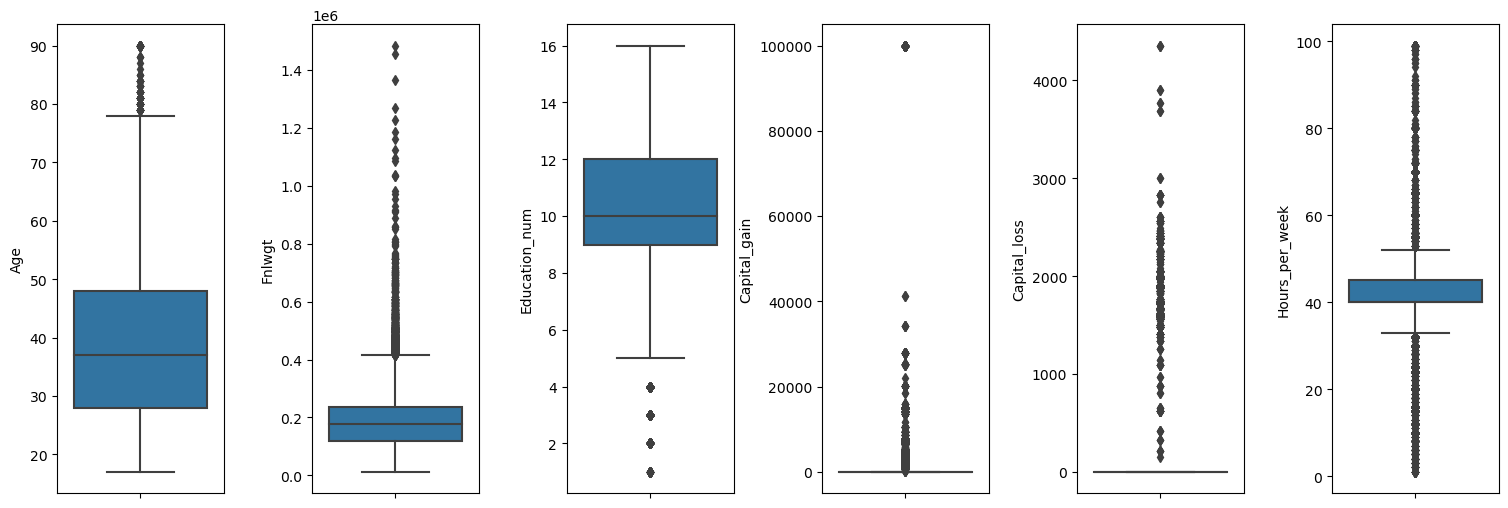

In [25]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()



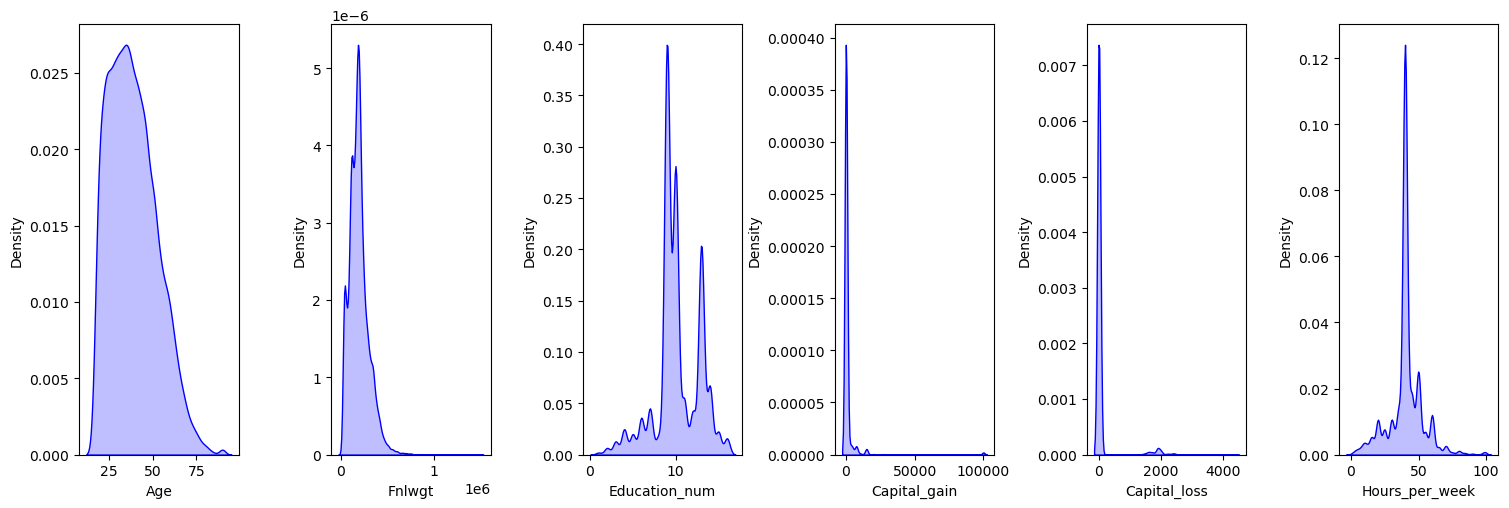

In [26]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()


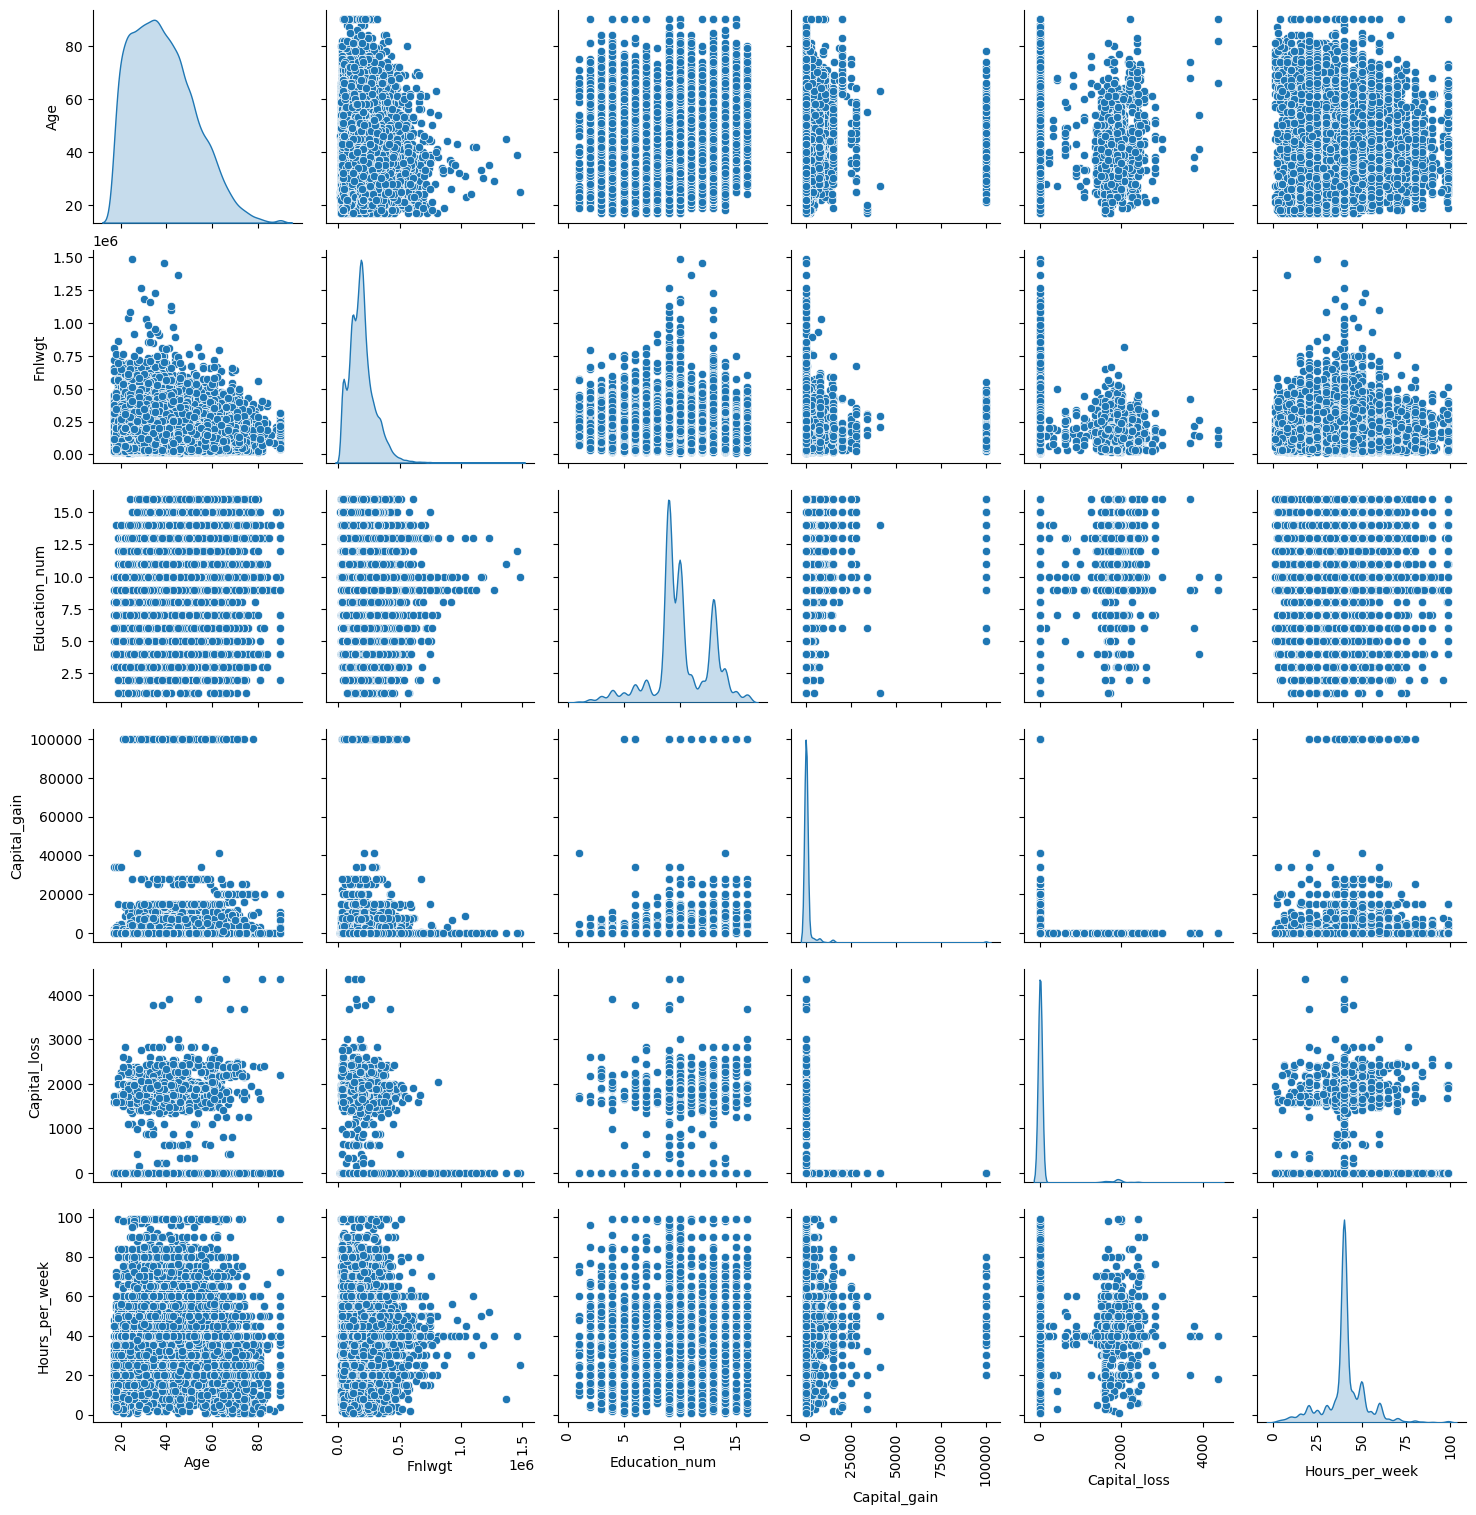

In [27]:
numvalues = df.drop(['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
                      'Native_country', 'Income'], axis=1)
plt.style.use('default')
g = sns.pairplot(numvalues, diag_kind="kde")
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()


# Heatmap

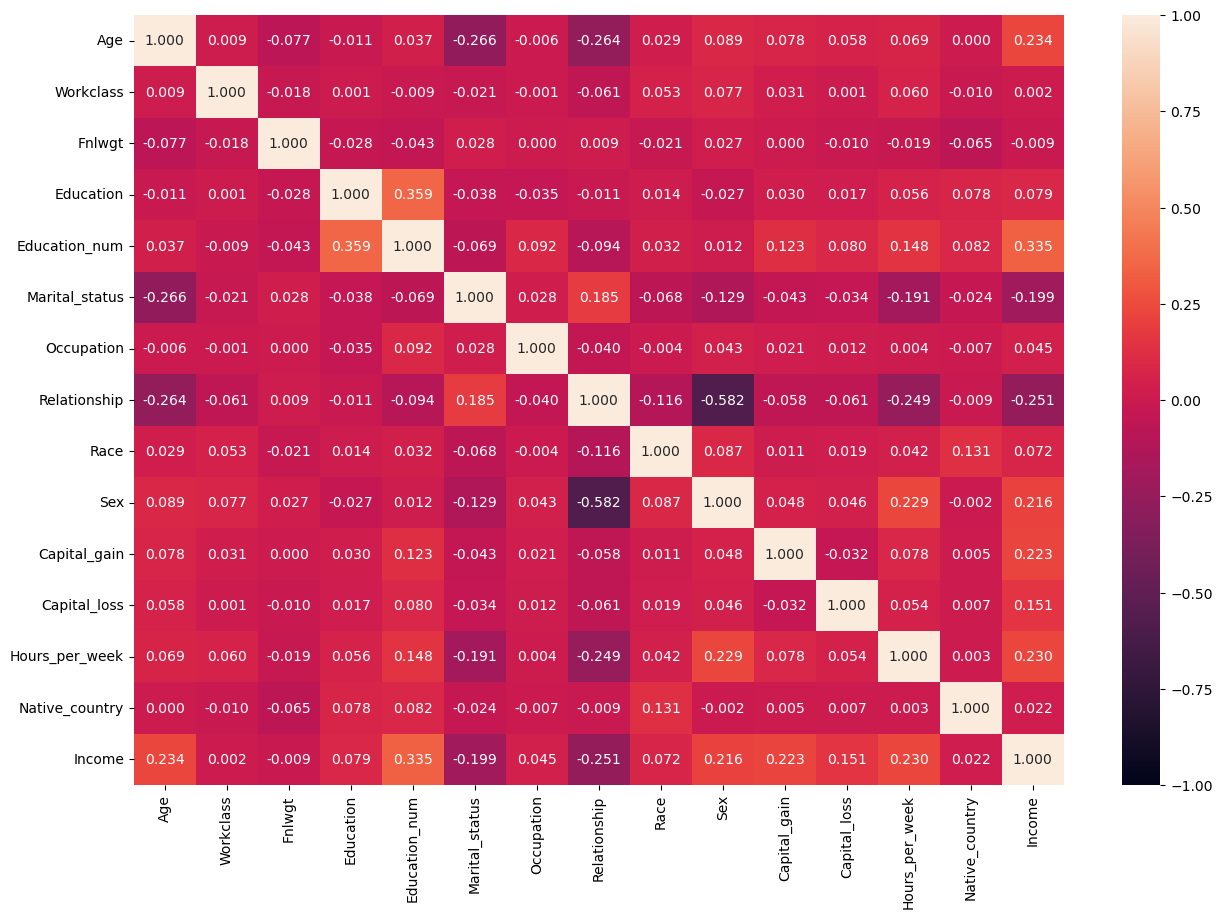

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='0.3f')
plt.show()

we can see there is no multicollinearity problem in our dataset

# Removing outliers

In [29]:
df.shape

(32560, 15)

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))


In [31]:
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [32]:

dfnew=df[(z<3).all(axis=1)]

In [33]:
dfnew.shape

(27782, 15)

% loss of data=(32560-27721)/32560 * 100=14.67%

# Reducing the skewness

In [34]:
df=dfnew.copy()

In [35]:
df.skew()

Age                0.484849
Workclass         -0.663777
Fnlwgt             0.628132
Education         -0.955885
Education_num     -0.146011
Marital_status    -0.045708
Occupation         0.101699
Relationship       0.753819
Race              -2.585938
Sex               -0.689465
Capital_gain       4.931812
Capital_loss      29.520944
Hours_per_week    -0.360027
Native_country    -4.364306
Income             1.322364
dtype: float64

In [36]:
for col in integer_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])


In [37]:
df.skew()

Age                0.484849
Workclass         -0.663777
Fnlwgt            -0.956362
Education         -0.955885
Education_num     -0.146011
Marital_status    -0.045708
Occupation         0.101699
Relationship       0.753819
Race              -2.585938
Sex               -0.689465
Capital_gain       3.112498
Capital_loss      25.012564
Hours_per_week    -0.360027
Native_country    -4.364306
Income             1.322364
dtype: float64

# Splitting Feature abd Target variable

In [38]:
X = df.drop('Income', axis=1)
Y = df['Income']


# Balancing our Target variable

In [39]:
Y.value_counts()


0    21552
1     6230
Name: Income, dtype: int64

In [40]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)


In [41]:
Y.value_counts()

0    21552
1    21552
Name: Income, dtype: int64

# Standard Scalar

In [42]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.778725,1.539063,-1.138631,-0.432524,1.015657,-0.319956,-0.814055,-0.731163,0.307541,0.608009,-0.381158,-0.033186,-2.647270,0.213381
1,-0.171963,0.048728,0.527911,0.137507,-0.632164,-1.854242,-0.356648,-0.108963,0.307541,0.608009,-0.381158,-0.033186,-0.152356,0.213381
2,1.016397,0.048728,0.676435,-2.712650,-1.456074,-0.319956,-0.356648,-0.731163,-3.496585,0.608009,-0.381158,-0.033186,-0.152356,0.213381
3,-0.251186,0.048728,1.013972,0.422523,1.427612,-0.319956,-0.814055,2.379834,0.307541,-1.691258,-0.381158,-0.033186,-0.152356,0.213381
4,0.699501,0.048728,0.006956,-1.287571,-2.279984,0.447187,0.329463,-0.108963,-3.496585,-1.691258,-0.381158,-0.033186,-2.370058,-5.833939


# Model Building

In [43]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State =", maxRS)


Best accuracy score is 78.00668151447661 on Random State = 245


In [44]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=245)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)



In [45]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      4312
           1       0.77      0.79      0.78      4309

    accuracy                           0.78      8621
   macro avg       0.78      0.78      0.78      8621
weighted avg       0.78      0.78      0.78      8621

Accuracy Score: 77.6824034334764
Cross Validation Score: 76.6587849612356

Accuracy Score - Cross Validation Score is 1.0236184722407984


In [46]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=41)
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      4312
           1       0.81      0.91      0.86      4309

    accuracy                           0.85      8621
   macro avg       0.85      0.85      0.85      8621
weighted avg       0.85      0.85      0.85      8621

Accuracy Score: 84.75814870664657
Cross Validation Score: 84.04791865543885

Accuracy Score - Cross Validation Score is 0.7102300512077164


In [47]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      4312
           1       0.84      0.89      0.87      4309

    accuracy                           0.86      8621
   macro avg       0.86      0.86      0.86      8621
weighted avg       0.86      0.86      0.86      8621

Accuracy Score: 86.24289525577079
Cross Validation Score: 86.08256641972025

Accuracy Score - Cross Validation Score is 0.16032883605053883


In [48]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=41)
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      4312
           1       0.85      0.93      0.89      4309

    accuracy                           0.89      8621
   macro avg       0.89      0.89      0.89      8621
weighted avg       0.89      0.89      0.89      8621

Accuracy Score: 88.55121215636237
Cross Validation Score: 88.00581863043651

Accuracy Score - Cross Validation Score is 0.54539352592586


In [49]:
# KNeighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      4312
           1       0.81      0.90      0.85      4309

    accuracy                           0.85      8621
   macro avg       0.85      0.85      0.85      8621
weighted avg       0.85      0.85      0.85      8621

Accuracy Score: 84.6653520473263
Cross Validation Score: 83.64887875637403

Accuracy Score - Cross Validation Score is 1.0164732909522627


In [50]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      4312
           1       0.90      0.93      0.91      4309

    accuracy                           0.91      8621
   macro avg       0.91      0.91      0.91      8621
weighted avg       0.91      0.91      0.91      8621

Accuracy Score: 91.04512237559447
Cross Validation Score: 90.29098588645704

Accuracy Score - Cross Validation Score is 0.7541364891374371


In [51]:
# LGBM Classifier
!pip install lightgbm
import lightgbm as lgb
model=lgb.LGBMClassifier()
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4312
           1       0.89      0.91      0.90      4309

    accuracy                           0.90      8621
   macro avg       0.90      0.90      0.90      8621
weighted avg       0.90      0.90      0.90      8621

Accuracy Score: 89.94316204616634
Cross Validation Score: 88.55102753191836

Accuracy Score - Cross Validation Score is 1.3921345142479709


From the above comparision with all the methods, we can choose extra Trees Classifier for HyperParameter Tuning

# Hyperparameter Tuning

In [52]:
# Extra Trees Classifier

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 739, 1000],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]
             }


In [53]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)


In [54]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 739, 1000]})

In [55]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 42}

In [56]:
Final = ExtraTreesClassifier(criterion='gini', max_depth=30, n_estimators=300, n_jobs=-2, random_state=1000)
Classifier = Final.fit(X_train, Y_train)
fmod_pred = Final.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)


Accuracy score for the Best Model is: 89.66221232368225


Our model predicts accuracy of 89.66%

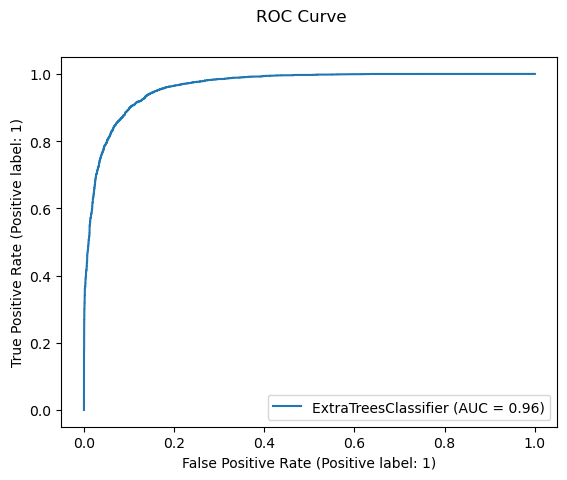

In [57]:
disp = metrics.plot_roc_curve(Final, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

# saving the model

In [58]:
import pickle
filename = "Census Income.pkl"
pickle.dump(Final,open(filename,'wb'))